# Name: Jieyi Chen

# Table of contents
1. [Business Problem Statement](#BPStatement)
2. [Exploratory Data Analysis](#EDA)  
    2.1 [Imports](#imports)  
    2.2 [A first look at the data](#firstlook)  
    2.3 [Data transformation](#cleaning)  
    2.4 [Exploration questions](#questions)  
    2.5 [Results and findings](#findings)  
    2.6 [Ethical consideration](#ethic)
3. [Modeling](#modeling)  
    3.1 [Stratified sampling](#sampling)    
    3.2 [Pre-processing before modeling](#pre-processing)  
    3.3 [Modeling training](#modeling)  
    3.4 [Test set evaluation](#testevaluation)  

 


## Business Problem statement <a name="BPStatement"></a>

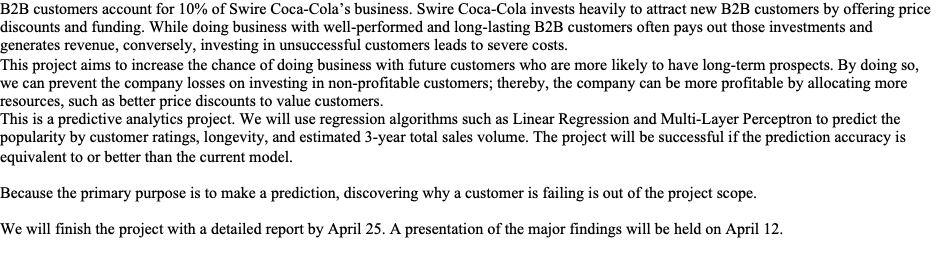

## Exploratory Data Analysis <a name="EDA"></a>

### 2.1 Imports<a name="imports"></a>

In [852]:
import datetime
import pyxlsb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [853]:
# load the data
sales = pd.read_excel('FSOP_Sales_Data_v2.0.xlsb', engine='pyxlsb')
customer = pd.read_excel('FSOP_Customer_Data_v2.0.xlsb', engine='pyxlsb')


In [854]:
# 2021 household by zip code from data.census.gov
population = pd.read_csv('ACSST5Y2021.S1901-Data.csv')

### 2.2 A first look at the data <a name="firstlook"></a>
In this section, we are going to take a quick look of the data by checking the size, data type, counts of variables.


In [98]:
sales.info() # MIN_POSTING_DATE and MAX_POSTING_DATE need to be changed to the right format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831858 entries, 0 to 831857
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   CUSTOMER_NUMBER_BLINDED           831858 non-null  object 
 1   PRODUCT_SOLD_BLINDED              831858 non-null  object 
 2   BEV_CAT_DESC                      758235 non-null  object 
 3   CALORIE_CAT_DESC                  758235 non-null  object 
 4   PACK_TYPE_DESC                    831858 non-null  object 
 5   PACK_SIZE_SALES_UNIT_DESCRIPTION  831858 non-null  object 
 6   PHYSICAL_VOLUME                   831858 non-null  float64
 7   DISCOUNT                          831858 non-null  float64
 8   INVOICE_PRICE                     831858 non-null  float64
 9   DEAD_NET                          831858 non-null  float64
 10  GROSS_PROFIT_DEAD_NET             831858 non-null  float64
 11  COGS                              831858 non-null  f

In [99]:
customer.info() # ON_BOARDING_DATE needs to be changed to the right format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40386 entries, 0 to 40385
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CUSTOMER_NUMBER_BLINDED                 40386 non-null  object 
 1   SALES_OFFICE_DESCRIPTION                40386 non-null  object 
 2   DELIVERY_PLANT_DESCRIPTION              40386 non-null  object 
 3   ON_BOARDING_DATE                        40386 non-null  int64  
 4   ADDRESS_CITY                            40386 non-null  object 
 5   ADDRESS_ZIP_CODE                        40386 non-null  object 
 6   COUNTY                                  40384 non-null  object 
 7   GEO_LONGITUDE                           40386 non-null  float64
 8   GEO_LATITUDE                            40386 non-null  float64
 9   CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION   40386 non-null  object 
 10  CUSTOMER_TRADE_CHANNEL_DESCRIPTION      40386 non-null  ob

In [100]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33774 entries, 0 to 33773
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Geographic Area Name       33774 non-null  object
 1   Estimate Households Total  33774 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 527.8+ KB


In [101]:
# counts of categorical attributes PACK_TYPE_DESC
sales["PACK_TYPE_DESC"].value_counts()

Plastic Bottle - Other      279567
Aluminum Can                165113
Bag-In-Box                  156987
Plastic Bottle - Contour     68587
Glass Bottle  - Other        31530
CO2 Tank                     30159
Shell                        28616
Plastic Bottle - Dimple      22542
Pallet                       12455
Aluminum Can - Sleek         12428
Paper Cup                     6627
Plastic Lid                   5647
Glass Bottle - Dimple         4286
Plastic Cup                   4216
Glass Bottle  - Contour       1215
Other                          496
Aluminum Bottle                432
Styrofoam Cup                  426
Styrofoam Lid                  166
Plastic Cartridge              162
Aluminum Bottle - Dimple       100
Plastic Pouch                   61
Tetra Pak                       36
Not Applicable                   2
Tank                             2
Name: PACK_TYPE_DESC, dtype: int64

In [102]:
# counts of categorical attributes county
customer["COUNTY"].value_counts()

MARICOPA       5016
SALT LAKE      2673
KING           2535
BERNALILLO     1211
PIERCE         1173
               ... 
RIO ARRIBA        1
LOS ANGELES       1
CHERRY            1
QUEENS            1
DEUEL             1
Name: COUNTY, Length: 247, dtype: int64

In [103]:
# counts of categorical attributes CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION
customer["CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION"].value_counts()

Eating & Drinking       21808
Other Shopping & Ser     6021
Entertainment/Recrea     3747
At-Work                  2518
Third Party (Non-Con     2352
Travel/Transportatio     1699
Educational              1247
Grocery Shopping          994
Name: CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION, dtype: int64

In [104]:
# counts of categorical attributes CUSTOMER_TRADE_CHANNEL_DESCRIPTION
customer["CUSTOMER_TRADE_CHANNEL_DESCRIPTION"].value_counts()

Quick Service Restau    10290
Full Service Restaur     6668
General Merchandiser     3213
Other Eating & Drink     2523
All Other                2221
Amusement                1933
Bar/Tavern/Licensed      1837
Automotive Services      1785
Lodging                  1541
Recreation               1512
Business & Professio     1066
Retail Specialty Ser      927
Primary/Secondary Sc      803
Specialty Food Store      776
Health/Hospital           694
Street Vendor             490
College/University        444
Government (Non-Mili      388
Leisure                   302
Supermarket               218
Industrial/Agricultu      211
Military                  159
Transportation            158
Wholesale                 131
Drug Store                 96
Name: CUSTOMER_TRADE_CHANNEL_DESCRIPTION, dtype: int64

In [105]:
# counts of categorical attributes MARKET_DESCRIPTION
customer["MARKET_DESCRIPTION"].value_counts()


FSOP            38674
ALL OTHER        1708
SUPPLY CHAIN        4
Name: MARKET_DESCRIPTION, dtype: int64

In [106]:
# counts of categorical attributes COLD_DRINK_CHANNEL_DESCRIPTION
customer["COLD_DRINK_CHANNEL_DESCRIPTION"].value_counts()

EATING/DRINKING      21823
RETAIL                6696
DESTINATION VENUE     3495
WHOLESALE             2549
GOV'T/EDU             1991
LODGING               1539
AT WORK               1481
HEALTH/HOSPITAL        716
NON COLD DRINK          96
Name: COLD_DRINK_CHANNEL_DESCRIPTION, dtype: int64

### 2.3 Data transformations <a name="cleaning"></a>

- Fix date format in sales dataframe and customer dataframe
- Add leading zeros to zip codes
- Fix missing values
- Check if there is any duplicates
- Remove data that makes no sense

In [107]:
# extract the zip codes
population.rename(columns={'Geographic Area Name':'POP_ZIP_CODE', 'Estimate Households Total':'EST_HOUSEHOLDS'}, inplace=True)
population['POP_ZIP_CODE'] = population['POP_ZIP_CODE'].str[-5:]

In [108]:
# fix the zip codes
customer['ADDRESS_ZIP_CODE'] = customer['ADDRESS_ZIP_CODE'].apply(lambda x: x[:5] if len(str(x)) > 5 else x)

In [109]:
# create a function to formate the dates 
def date_to_string(digit_date):
    new_form = []
    for d in digit_date:
        try:
            x = datetime.date(1899,12,30) + datetime.timedelta(days=float(d))
            new_form.append(x.strftime('%m-%d-%Y'))
        except:
            new_form.append('n/a')
    return new_form

In [110]:
# format the date columns 
sales["MAX_POSTING_DATE"] = date_to_string(sales["MAX_POSTING_DATE"])
sales["MIN_POSTING_DATE"] = date_to_string(sales["MIN_POSTING_DATE"])
customer["ON_BOARDING_DATE"] = date_to_string(customer["ON_BOARDING_DATE"])

In [111]:
# check missing values
sales.isnull().sum()

CUSTOMER_NUMBER_BLINDED                 0
PRODUCT_SOLD_BLINDED                    0
BEV_CAT_DESC                        73623
CALORIE_CAT_DESC                    73623
PACK_TYPE_DESC                          0
PACK_SIZE_SALES_UNIT_DESCRIPTION        0
PHYSICAL_VOLUME                         0
DISCOUNT                                0
INVOICE_PRICE                           0
DEAD_NET                                0
GROSS_PROFIT_DEAD_NET                   0
COGS                                    0
MIN_POSTING_DATE                        0
MAX_POSTING_DATE                        0
NUM_OF_TRANSACTIONS                     0
dtype: int64

In [112]:
customer.isnull().sum()

CUSTOMER_NUMBER_BLINDED                   0
SALES_OFFICE_DESCRIPTION                  0
DELIVERY_PLANT_DESCRIPTION                0
ON_BOARDING_DATE                          0
ADDRESS_CITY                              0
ADDRESS_ZIP_CODE                          0
COUNTY                                    2
GEO_LONGITUDE                             0
GEO_LATITUDE                              0
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION     0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION        0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION    0
BUSINESS_TYPE_EXTENSION_DESCRIPTION       0
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2       0
MARKET_DESCRIPTION                        0
COLD_DRINK_CHANNEL_DESCRIPTION            0
dtype: int64

In [113]:
# missing value: non-beverage product does not have BEV_CAT_DESC and CALORIE_CAT_DESC
sales.loc[sales.isna().sum(axis = 1) > 0].head()

,CUSTOMER_NUMBER_BLINDED,PRODUCT_SOLD_BLINDED,BEV_CAT_DESC,CALORIE_CAT_DESC,PACK_TYPE_DESC,PACK_SIZE_SALES_UNIT_DESCRIPTION,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,MIN_POSTING_DATE,MAX_POSTING_DATE,NUM_OF_TRANSACTIONS
42,C0322020906550025,M085200910065,NaN,NaN,CO2 Tank,20 POUND 1-Ls,-12.0,0.00,0.00,0.00,0.00,0.00,01-14-2021,10-27-2022,12
117,C0194029305800294,M092808600873,NaN,NaN,Shell,20 OZ 1-Ls,-109.0,0.00,0.00,0.00,0.00,0.00,03-09-2021,10-10-2022,21
151,C0718054703600448,M044500680441,NaN,NaN,Pallet,36 X 36 INCH 1-Ls,-204.0,0.00,0.00,0.00,0.00,0.00,01-04-2021,12-29-2022,107
222,C0170068001750998,M092808600873,NaN,NaN,Shell,20 OZ 1-Ls,-30.0,0.00,0.00,0.00,0.00,0.00,05-17-2021,12-19-2022,17
337,C0883031108890244,M012200130431,NaN,NaN,Styrofoam Cup,32 OZ 1-Ls,87.0,4283.61,4416.39,4416.39,2501.61,1914.78,01-05-2021,12-27-2022,87


In [114]:
# return rows with missing values
customer.loc[customer.isnull().sum(axis = 1) > 0]

,CUSTOMER_NUMBER_BLINDED,SALES_OFFICE_DESCRIPTION,DELIVERY_PLANT_DESCRIPTION,ON_BOARDING_DATE,ADDRESS_CITY,ADDRESS_ZIP_CODE,COUNTY,GEO_LONGITUDE,GEO_LATITUDE,CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION,BUSINESS_TYPE_EXTENSION_DESCRIPTION,CUSTOMER_TRADE_CHANNEL_DESCRIPTION2,MARKET_DESCRIPTION,COLD_DRINK_CHANNEL_DESCRIPTION
3215,C0033076409450413,"Boise, ID","Boise, ID",10-18-2021,CALDWELL,83605,NaN,-116.660464,43.638985,At-Work,Business & Professio,Other Business And P,DSD,Business & Professio,FSOP,AT WORK
28426,C0482077102810059,"Reno, NV","Reno, NV",06-24-2013,BLAIRSDEN GRAEAGLE,96103,NaN,-120.691583,39.840255,Eating & Drinking,Quick Service Restau,QSR-Hamburger,DSD,Quick Service Restau,FSOP,EATING/DRINKING


In [115]:
# replace missing values with county information
customer.loc[3215,'COUNTY']='CANYON'
customer.loc[28426,'COUNTY']='PLUMAS'

In [116]:
# check if the column 'COUNTY' has been updated
customer.count()

CUSTOMER_NUMBER_BLINDED                   40386
SALES_OFFICE_DESCRIPTION                  40386
DELIVERY_PLANT_DESCRIPTION                40386
ON_BOARDING_DATE                          40386
ADDRESS_CITY                              40386
ADDRESS_ZIP_CODE                          40386
COUNTY                                    40386
GEO_LONGITUDE                             40386
GEO_LATITUDE                              40386
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION     40386
CUSTOMER_TRADE_CHANNEL_DESCRIPTION        40386
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION    40386
BUSINESS_TYPE_EXTENSION_DESCRIPTION       40386
CUSTOMER_TRADE_CHANNEL_DESCRIPTION2       40386
MARKET_DESCRIPTION                        40386
COLD_DRINK_CHANNEL_DESCRIPTION            40386
dtype: int64

In [117]:
# check if there is any dupliactes
print(customer.duplicated().sum())
print(sales.duplicated().sum())

0
0


In [118]:
# make a deep copy of both of the datasets
customer_copy = customer.copy()
sales_copy = sales.copy()

In [119]:
# Update the data type before merging the three datasets
customer_copy.ADDRESS_ZIP_CODE = customer_copy.ADDRESS_ZIP_CODE.astype(str)
population.POP_ZIP_CODE = population.POP_ZIP_CODE.astype(str)

# Merge the three datasets
customer_sales = customer_copy.merge(sales_copy, on='CUSTOMER_NUMBER_BLINDED', how='left').\
merge(population, how='left', left_on='ADDRESS_ZIP_CODE',right_on='POP_ZIP_CODE')


In [120]:
# 173 address zip code does not have estimated number of household info
outer = customer_copy.merge(population, how='outer', left_on='ADDRESS_ZIP_CODE',right_on='POP_ZIP_CODE', indicator=True)
#perform anti-join
anti_join = outer[(outer._merge=='left_only')].drop('_merge', axis=1)
#view results
len(anti_join)

173

In [121]:
customer_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831844 entries, 0 to 831843
Data columns (total 32 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   CUSTOMER_NUMBER_BLINDED                 831844 non-null  object 
 1   SALES_OFFICE_DESCRIPTION                831844 non-null  object 
 2   DELIVERY_PLANT_DESCRIPTION              831844 non-null  object 
 3   ON_BOARDING_DATE                        831844 non-null  object 
 4   ADDRESS_CITY                            831844 non-null  object 
 5   ADDRESS_ZIP_CODE                        831844 non-null  object 
 6   COUNTY                                  831844 non-null  object 
 7   GEO_LONGITUDE                           831844 non-null  float64
 8   GEO_LATITUDE                            831844 non-null  float64
 9   CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION   831844 non-null  object 
 10  CUSTOMER_TRADE_CHANNEL_DESCRIPTION      8318

In [122]:
# make a deep copy of the merged datasets

customer_sales_copy = customer_sales.copy()

In [123]:
customer_sales_copy["ON_BOARDING_DATE"].max()

'12-31-9999'

In [124]:
# drop rows with undefine on boarding date
index_to_drop = customer_sales_copy.loc[customer_sales_copy['ON_BOARDING_DATE'] =='12-31-9999'].index
index_to_drop
customer_sales_copy.drop(index_to_drop, axis=0, inplace=True, errors ='ignore')

In [125]:
# convert date from string to datetime
customer_sales_copy["ON_BOARDING_DATE"] = pd.to_datetime(customer_sales_copy["ON_BOARDING_DATE"])
customer_sales_copy["MAX_POSTING_DATE"] = pd.to_datetime(customer_sales_copy["MAX_POSTING_DATE"])
customer_sales_copy["MIN_POSTING_DATE"] = pd.to_datetime(customer_sales_copy["MIN_POSTING_DATE"])

### 2.4 Exploration questions<a name="questions"></a>

- What is the distribution of each variable?
- Do there appear to be outliers? 
- Are the max/min values reasonable for the variables? Do you see any values that look like errors?
- Is there multicollinearity? (Two features that have a correlation > 0.8)
- What are the top trade channels that have the most customers or generate the most revenue?
- Do long term customers correlate to higher revenue?
- Do customers in highly populated zip codes lead to higher revenue?
- Which variables are most correlated with your target variable?(assume invoice price is the target variable)

In [126]:
# summary tabe of the distribution of each continuous variable 
customer_sales_copy.describe() 

,GEO_LONGITUDE,GEO_LATITUDE,PHYSICAL_VOLUME,DISCOUNT,INVOICE_PRICE,DEAD_NET,GROSS_PROFIT_DEAD_NET,COGS,NUM_OF_TRANSACTIONS,EST_HOUSEHOLDS
count,831840.000000,831840.000000,831840.000000,8.318400e+05,8.318400e+05,8.318400e+05,831840.000000,8.318400e+05,831840.000000,826556.000000
mean,-114.072049,40.844499,36.216803,1.003796e+03,9.264534e+02,8.452805e+02,294.969724,5.802697e+02,21.227103,11468.858377
std,6.234537,5.025530,564.498516,1.333824e+04,8.980715e+03,7.750904e+03,2631.949238,5.575575e+03,33.455866,6524.359599
min,-124.590450,0.000000,-65832.000000,-1.390200e+04,-2.298240e+04,-3.453411e+04,-145562.380000,-7.392340e+03,1.000000,0.000000
25%,-121.301071,37.678385,1.000000,1.764000e+01,3.110000e+01,2.928000e+01,8.620000,1.246000e+01,2.000000,6421.000000
50%,-112.036835,40.605505,5.000000,9.000000e+01,1.367950e+02,1.300000e+02,44.800000,7.270000e+01,7.000000,11655.000000
75%,-110.976735,45.514964,17.000000,4.134000e+02,5.234200e+02,5.000000e+02,181.942500,2.976725e+02,24.000000,15966.000000
max,0.000000,49.002050,136349.000000,2.847662e+06,1.813004e+06,1.813004e+06,883618.130000,1.370468e+06,468.000000,30181.000000


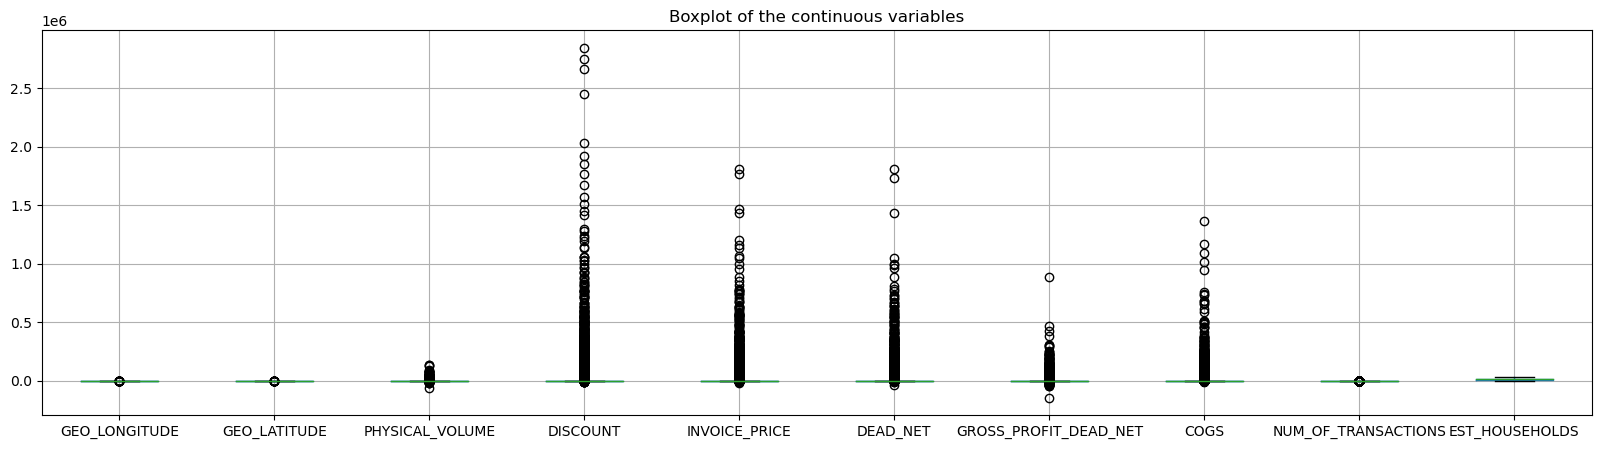

In [127]:
# Boxplot of the continuous variables
customer_sales_copy.boxplot(figsize =(20,5))
plt.title('Boxplot of the continuous variables')
plt.show()

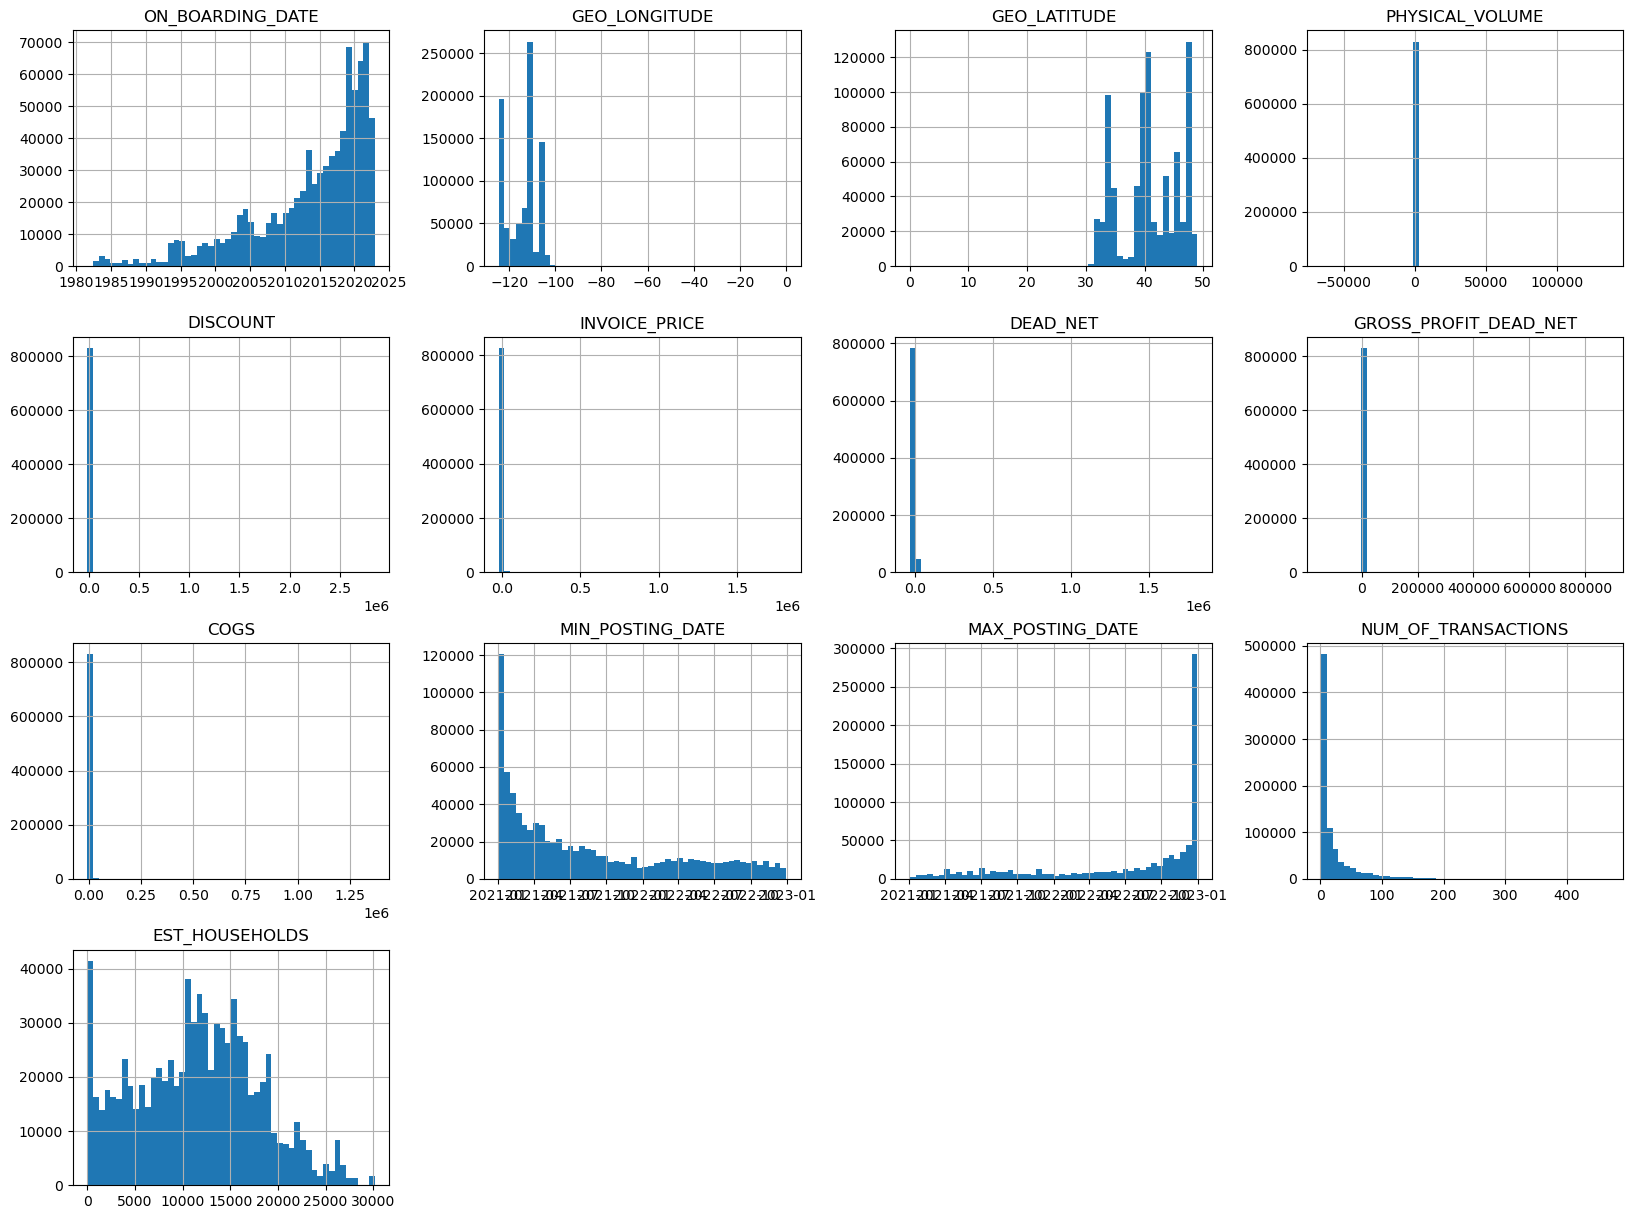

In [128]:
# Histogram of continuous variables
customer_sales_copy.hist(bins=50, figsize=(20,15))
plt.title('Histogram of continuous variables')
plt.show()

**What is the distribution of each variable?**  
Attributes have very different scales  
Number of days with transactions is right skewed  
In summary, the data is not normally distributed

**Do there appear to be outliers?**  
Yes, Columns like DICOUNT, INVOICE_PRICE, DAED_NET, GROSS_PROFIT_DAED_NET, COGS seem to have outliers

**Are the max/min values reasonable for the variables? Do you see any values that look like errors?**  
From the distribution summary table, we can tell that columns PHYSICAL_VOLUME and discount have negative number. We can assume the negative numbers means refund and return that happend for problems like damaged goods

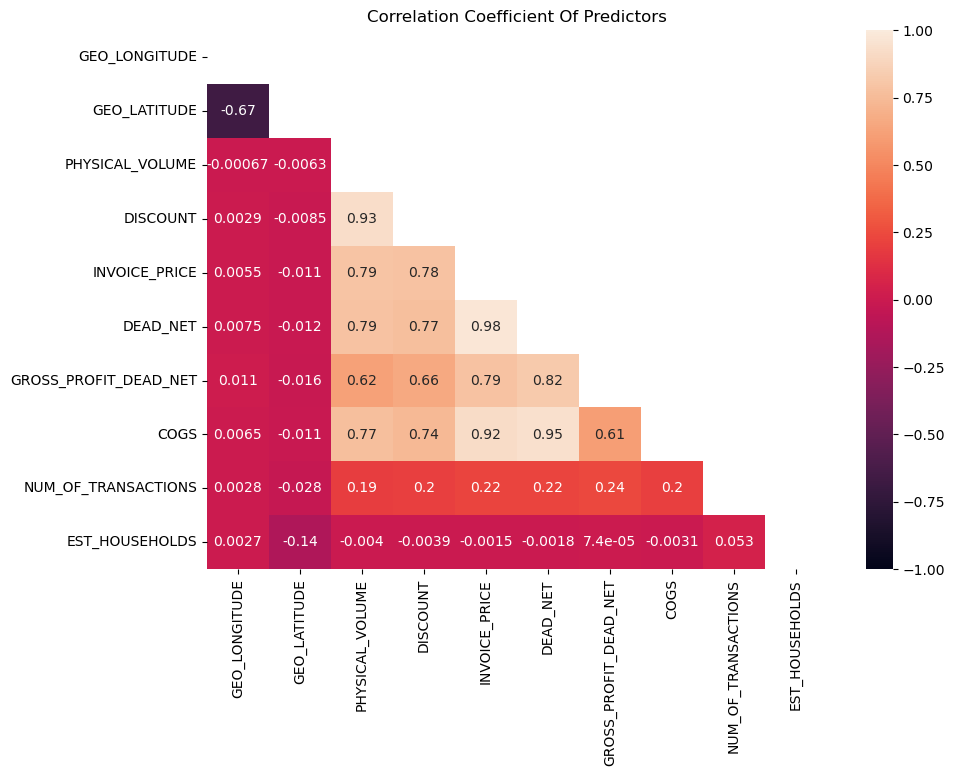

In [129]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(customer_sales_copy.corr(), dtype=bool))

# generate heatmap
sns.heatmap(customer_sales_copy.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

**Is there multicollinearity? (Two features that have a correlation > 0.8)**  
Yes. From the plot of Correlation Coefficient Of Predictors, we noticed there are multcollinearity for the following varaibles:  
DEAD_NET and INVOICE_PRICE  
DEAD_NET and GROSS_PROFIT_DEAD_NET  
DISCOUNT and PHYSICAL_VOLUME  
COGS and INVOICE_PRICE  
COGS and DEAD_NET  

In [864]:
# number of customers by trade channels
a = customer_sales_copy.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['CUSTOMER_NUMBER_BLINDED']\
.nunique().reset_index(name='counts').sort_values('counts', ascending=[False])

a.head(n=40)

,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,counts
17,Quick Service Restau,10290
7,Full Service Restaur,6668
8,General Merchandiser,3213
15,Other Eating & Drink,2523
0,All Other,2221
1,Amusement,1933
3,Bar/Tavern/Licensed,1837
2,Automotive Services,1785
13,Lodging,1541
18,Recreation,1512


In [863]:
# amount of revenue by trade channels
b = customer_sales_copy.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['INVOICE_PRICE']\
.sum().reset_index(name='total_revenue').sort_values('total_revenue', ascending=[False])

c = a.merge(b, on='CUSTOMER_TRADE_CHANNEL_DESCRIPTION', how='inner')

c['average_revenue_per_customer_by_channel'] = c.total_revenue/c.counts

c.sort_values('average_revenue_per_customer_by_channel', ascending=[False]).head(n=100)

,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,counts,total_revenue,average_revenue_per_customer_by_channel
23,Wholesale,130,2.969082e+07,228390.912538
22,Transportation,158,3.341131e+07,211464.006772
19,Supermarket,218,2.730909e+07,125271.037936
4,All Other,2221,1.908810e+08,85943.701256
18,Leisure,302,2.051603e+07,67933.884007
16,College/University,444,2.353382e+07,53004.106802
14,Health/Hospital,694,3.062887e+07,44133.816700
2,General Merchandiser,3213,7.978706e+07,24832.574121
5,Amusement,1933,4.143359e+07,21434.864920
21,Military,159,3.381890e+06,21269.749371


In [862]:
c

,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,counts,total_revenue,average_revenue_per_trade_channel
0,Quick Service Restau,10290,9.886079e+07,9607.462359
1,Full Service Restaur,6668,6.413091e+07,9617.712476
2,General Merchandiser,3213,7.978706e+07,24832.574121
3,Other Eating & Drink,2523,2.649617e+07,10501.849306
4,All Other,2221,1.908810e+08,85943.701256
5,Amusement,1933,4.143359e+07,21434.864920
6,Bar/Tavern/Licensed,1837,1.053971e+07,5737.458046
7,Automotive Services,1785,9.933941e+06,5565.232829
8,Lodging,1541,2.088465e+07,13552.660389
9,Recreation,1512,2.522195e+07,16681.184841


In [861]:
d = customer_sales_copy.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['INVOICE_PRICE']\
.sum().reset_index(name='total_revenue').sort_values('total_revenue', ascending=[False])

e = a.merge(d, on='CUSTOMER_TRADE_CHANNEL_DESCRIPTION', how='inner')

e.sort_values('total_revenue', ascending=[False]).head(n=100)

,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,counts,total_revenue
4,All Other,2221,1.908810e+08
0,Quick Service Restau,10290,9.886079e+07
2,General Merchandiser,3213,7.978706e+07
1,Full Service Restaur,6668,6.413091e+07
5,Amusement,1933,4.143359e+07
22,Transportation,158,3.341131e+07
14,Health/Hospital,694,3.062887e+07
23,Wholesale,130,2.969082e+07
19,Supermarket,218,2.730909e+07
3,Other Eating & Drink,2523,2.649617e+07


In [865]:
f = customer_sales_copy.groupby('CUSTOMER_TRADE_CHANNEL_DESCRIPTION')['NUM_OF_TRANSACTIONS']\
.sum().reset_index(name='total_transactions').sort_values('total_transactions', ascending=[False])

g = a.merge(f, on='CUSTOMER_TRADE_CHANNEL_DESCRIPTION', how='inner')
g['average_transactions_by_channel'] = g.total_transactions/g.counts

g.sort_values('average_transactions_by_channel', ascending=[False]).head(n=100)

,CUSTOMER_TRADE_CHANNEL_DESCRIPTION,counts,total_transactions,average_transactions_by_channel
19,Supermarket,218,741018,3399.165138
14,Health/Hospital,694,940245,1354.819885
16,College/University,444,486661,1096.083333
2,General Merchandiser,3213,2892774,900.334267
4,All Other,2221,1993848,897.725349
18,Leisure,302,226303,749.347682
22,Transportation,158,116262,735.835443
8,Lodging,1541,968660,628.591823
17,Government (Non-Mili,388,222030,572.242268
23,Wholesale,130,69566,535.123077


**What are the top trade channels that have the most customers or generate the most revenue?**  
From the above summary tables of trade channels, we can learn that near 42% of the customers are in the trade channels of quick service restaurants and full service restaurants. However, as for the average revenue per customer with each trade channel, Wholesale, Transportation, and supermarket are the most profitable trade channel although these customers are also contribute to a small percentage of the total customers. 

In [132]:
# calculate the number of year a customer has doing business with swire
customer_sales_copy['NUM_YEAR_CUSTOMER'] = pd.to_datetime(customer_sales_copy['MAX_POSTING_DATE']).dt.year\
- pd.to_datetime(customer_sales_copy['ON_BOARDING_DATE']).dt.year 

# select the max number of year for each customers
customer_sales_copy['NUM_YEAR_CUSTOMER_TRANS'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['NUM_YEAR_CUSTOMER']\
.transform(max)

# calculate the total invoice price of each customer from the data extracting period
customer_sales_copy['SUM_OF_REVENUE'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['INVOICE_PRICE'].transform('sum')



In [139]:
# aggregate the transctions by customers number
customer_sales_copy['TOTAL_PHYSICAL_VOLUME'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['PHYSICAL_VOLUME']\
.transform('sum')
customer_sales_copy['TOTAL_DISCOUNT'] = customer_sales_copy.groupby('CUSTOMER_NUMBERr_BLINDED')['DISCOUNT']\
.transform('sum')
customer_sales_copy['TOTAL_DEAD_NET'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['DEAD_NET']\
.transform('sum')
customer_sales_copy['TOTAL_GROSS_PROFIT_DEAD_NET'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['GROSS_PROFIT_DEAD_NET']\
.transform('sum')
customer_sales_copy['TOTAL_COGS'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['COGS']\
.transform('sum')
customer_sales_copy['TOTAL_NUM_OF_TRANSACTIONS'] = customer_sales_copy.groupby('CUSTOMER_NUMBER_BLINDED')['NUM_OF_TRANSACTIONS']\
.transform('sum')

In [177]:
# remove columns that are redundant
customer_sales_agg = customer_sales_copy.drop(["PHYSICAL_VOLUME", "DISCOUNT", "DEAD_NET","NUM_YEAR_CUSTOMER",\
                                               "GROSS_PROFIT_DEAD_NET", "COGS","INVOICE_PRICE", "BEV_CAT_DESC",\
                                              "PRODUCT_SOLD_BLINDED", "CALORIE_CAT_DESC", "PACK_TYPE_DESC",\
                                              "PACK_SIZE_SALES_UNIT_DESCRIPTION", "NUM_OF_TRANSACTIONS",\
                                              "MIN_POSTING_DATE", "MAX_POSTING_DATE", "ON_BOARDING_DATE"], axis=1)
    
# extract the unique rows before plotting
customer_sales_agg = customer_sales_agg.drop_duplicates()

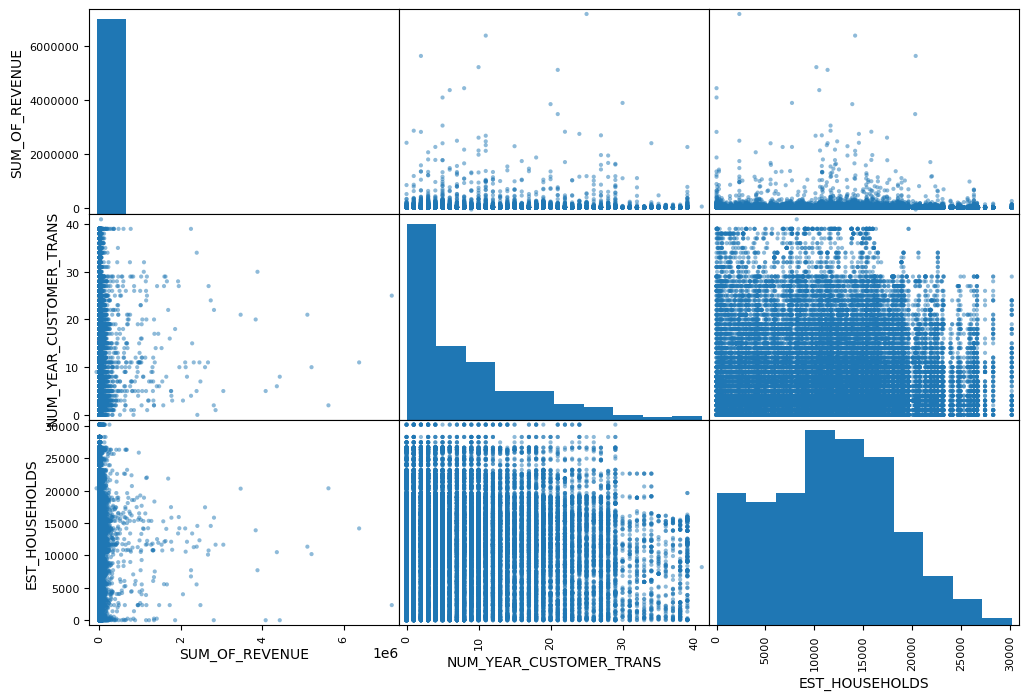

In [178]:
from pandas.plotting import scatter_matrix

attributes = ["SUM_OF_REVENUE", "NUM_YEAR_CUSTOMER_TRANS",
              "EST_HOUSEHOLDS"]
scatter_matrix(customer_sales_agg[attributes], figsize=(12, 8))

# create a scatter plot to show the relationship between among sum of revenue, number of years being a customer, and estimated number of households
plt.show()

**Do long term customers correlate to higher revenue?**  
The above matrix shows no significant correlation between revenue and the number of years of being a swire customers

**Do customers in highly populated zip codes lead to higher revenue?**  
The above matrix shows no significant correlation between revenue and customer location in the highly populated zip codes 

In [179]:
corr_matrix = customer_sales_agg.corr()
corr_matrix["SUM_OF_REVENUE"].sort_values(ascending=False)

SUM_OF_REVENUE                 1.000000
TOTAL_DEAD_NET                 0.986086
TOTAL_COGS                     0.966308
TOTAL_DISCOUNT                 0.932382
TOTAL_GROSS_PROFIT_DEAD_NET    0.907583
TOTAL_PHYSICAL_VOLUME          0.901250
TOTAL_NUM_OF_TRANSACTIONS      0.441530
NUM_YEAR_CUSTOMER_TRANS        0.068401
GEO_LONGITUDE                  0.009895
EST_HOUSEHOLDS                -0.005244
GEO_LATITUDE                  -0.015893
Name: SUM_OF_REVENUE, dtype: float64

In [172]:
# set max_colwidth to 100
pd.set_option("display.max_columns", None)
 
# set colwidth hidher
pd.set_option('display.max_colwidth', 100)


In [180]:
customer_sales_agg.shape

(40385, 25)

**Which variables are most correlated with your target variable?(assume invoice price is the target variable)**  
The sum of revenue for each customer is most correlated with the invoice price. Although dead net, cogs, discount, gross profit dead net, and physical volume are also seem to be correlated with the target variable, as we notice there is multicollinearity exists in the dateset, those correlation coefficient may not be affected.  

### 2.5 Results and findings <a name="findings"></a>


Resturants is the largest group of customers to Swire. Near 1/3 of the total customers are in the Quick service restaurant trade channel. In addition, most of the customers are also belong to the Eating and Drinking customer activity cluster. However, in terms of average revenue by trade channels, Wholesale, Transportation, and Supermarket are more profitable compare to restaurants. We have make some assumption of being a longer customer or having a location in more populated county are correlated with higher revenue. So far, we did not see any significant indicator to show any positive correlation for those variables. The most significant variable that correlated to the target variable is invoice price.

Next step  
The dataset is not normally distributed, further scaling (log/normalization) may be needed before modeling e.g. regression model
Dealing with categorical variables(e.g. create dummy variables)  
Multicollinearity may also need to be handled by dropping some highly correlated variables  
Feature engineering or feature selection may be needed to further improve the correlation between predictor variables and target varibles



### 2.6 Ethical consideration<a name="ethic"></a>
Concerns about secondary use of data is definite real. The data that we have received has no identifying information for the customers. However, there may be ways identify participants by using the geo information. Therefore, it may be necessary to explain why is it unavoidable to have identifying information to answer the questions and must also indicate how participants’ privacy and the confidentiality of the data will be protected.

If the data is freely available on the Internet, books or other public forum, permission for further use and analysis is implied. However, the ownership of the original data must be acknowledged.

## Modeling <a name="modeling"></a>

### 3.1 Stratified sampling <a name="sampling"></a>  

In [812]:
cs_copy = customer_sales_agg.copy()

In [813]:
cs_copy["SUM_OF_REVENUE"].describe()

count    4.038500e+04
mean     1.908285e+04
std      1.220974e+05
min     -7.058332e+04
25%      7.272200e+02
50%      3.721260e+03
75%      1.220428e+04
max      7.181258e+06
Name: SUM_OF_REVENUE, dtype: float64

In [814]:
# pd.cut() will give us bins of equal length/sizes
# but may contain very different 
# i.e. output can be skewed

label = [1,2,3,4,5,6,7]
cs_copy["REV_CAT"] = pd.cut(cs_copy["TOTAL_PHYSICAL_VOLUME"], 
                               bins=[-np.inf, 0.01, 10., 30., 40., 60., 100., np.inf],
                               labels=label)

# let's look at the distribution of observations for VOLUME_CAT
# set parameter normalize = True to get the relative frequencies of the unique values.


print(cs_copy["REV_CAT"].value_counts(normalize = True).sort_index())

1    0.157930
2    0.074879
3    0.112170
4    0.042491
5    0.064554
6    0.089018
7    0.458958
Name: REV_CAT, dtype: float64


In [815]:
from sklearn.model_selection import StratifiedShuffleSplit

splits = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)

# splits is a StratifiedShuffleSplit object. 
# Its .split() method generates two sets of indices to split data into training and test sets (as numpy ndarrays).
# split() is based on the second parameter only - here, the column income_cat
# which serves as the target for StratifiedShuffleSplit
# the first parameter housing is the data 

for train_index, test_index in splits.split(cs_copy, cs_copy["REV_CAT"]):
    print("!")

strat_train_set = cs_copy.iloc[train_index]
strat_test_set = cs_copy.iloc[test_index]

!
!
!
!
!


In [816]:
# the distribution of physical volume categories in the test set matches that in the original data very closely

strat_test_set["REV_CAT"].value_counts(normalize = True).sort_index()

1    0.157979
2    0.074904
3    0.112170
4    0.042466
5    0.064504
6    0.089018
7    0.458958
Name: REV_CAT, dtype: float64

In [817]:
# the distribution of physical volume categories in the train set matches that in the original data very closely

strat_train_set["REV_CAT"].value_counts(normalize = True).sort_index()

1    0.157918
2    0.074873
3    0.112170
4    0.042497
5    0.064566
6    0.089018
7    0.458958
Name: REV_CAT, dtype: float64

Both the distribution of physical volume categories in the test set and the train set matche the original data very closely. We can now drop the VOLUME_CAT colume and spearate the predictors from the target variable in both datasets. 


In [818]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop(["REV_CAT"], axis=1, inplace=True)

/var/folders/x7/51nmyc2s6bxbk0qtx8w339fr0000gn/T/ipykernel_10968/1559680277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(["REV_CAT"], axis=1, inplace=True)
/var/folders/x7/51nmyc2s6bxbk0qtx8w339fr0000gn/T/ipykernel_10968/1559680277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop(["REV_CAT"], axis=1, inplace=True)


In [819]:
 # create a deep copy and rename them as train and test sets.
train = strat_train_set.copy()
test = strat_test_set.copy()

In [820]:
# separate the features X from the target y in the train and test data sets
train_X = train.drop("SUM_OF_REVENUE", axis=1) 
train_y = train["SUM_OF_REVENUE"].copy()

test_X = test.drop("SUM_OF_REVENUE", axis=1)
test_y = test["SUM_OF_REVENUE"].copy()


### 3.2 Pre-processing before modeling  <a name="pre-processing"></a>  

**Handle missing values**  

In [821]:
# drop specified columns with NAs - POP_ZIP_CODE

train_X.drop(["POP_ZIP_CODE"], axis=1, inplace = True)      

In [822]:
# handle missing value in EST_HOUSEHOLDS column by imputting mean value from each county
train_X["EST_HOUSEHOLDS"] =  train_X["EST_HOUSEHOLDS"].fillna(train_X.groupby('COUNTY')['EST_HOUSEHOLDS'].transform('mean'))


**Cube root transformation**  
We noticed that some attributes have a tail-heavy distribution (skewness). And since there are zeros and negative values in some of the columes, we will use cube root transformation.

In [823]:
train_X["TOTAL_PHYSICAL_VOLUME"] = np.cbrt(train_X["TOTAL_PHYSICAL_VOLUME"])
train_X["TOTAL_DISCOUNT"] = np.cbrt(train_X["TOTAL_DISCOUNT"])
train_X["TOTAL_DEAD_NET"] = np.cbrt(train_X["TOTAL_DEAD_NET"])
train_X["TOTAL_GROSS_PROFIT_DEAD_NET"] = np.cbrt(train_X["TOTAL_GROSS_PROFIT_DEAD_NET"])
train_X["TOTAL_COGS"] = np.cbrt(train_X["TOTAL_COGS"])
train_X["TOTAL_NUM_OF_TRANSACTIONS"] = np.cbrt(train_X["TOTAL_NUM_OF_TRANSACTIONS"])

**Remove multicollinearity**  
We know the following sets have a correlation over 80%:  

DEAD_NET and INVOICE_PRICE  
DEAD_NET and GROSS_PROFIT_DEAD_NET  
DISCOUNT and PHYSICAL_VOLUME  
COGS and INVOICE_PRICE  
COGS and DEAD_NET  

We will Remove Multicollinearity by dropping some variables.

In [824]:
train_X_1 = train_X.drop(['TOTAL_DEAD_NET', 'TOTAL_COGS', 'TOTAL_DISCOUNT', 'TOTAL_PHYSICAL_VOLUME'], axis=1)

train_X_1.corr()

,GEO_LONGITUDE,GEO_LATITUDE,EST_HOUSEHOLDS,NUM_YEAR_CUSTOMER_TRANS,TOTAL_GROSS_PROFIT_DEAD_NET,TOTAL_NUM_OF_TRANSACTIONS
GEO_LONGITUDE,1.000000,-0.668366,-0.015835,0.043750,0.050784,0.004458
GEO_LATITUDE,-0.668366,1.000000,-0.127504,-0.023489,-0.049052,-0.002176
EST_HOUSEHOLDS,-0.015835,-0.127504,1.000000,-0.043620,-0.021880,0.026489
NUM_YEAR_CUSTOMER_TRANS,0.043750,-0.023489,-0.043620,1.000000,0.111393,0.208566
TOTAL_GROSS_PROFIT_DEAD_NET,0.050784,-0.049052,-0.021880,0.111393,1.000000,0.731167
TOTAL_NUM_OF_TRANSACTIONS,0.004458,-0.002176,0.026489,0.208566,0.731167,1.000000


After dropping the high correlated sets, all the correlations are under 80%

**Dropping uninformative categorical variables**  
There are variables do not add value to the predictive models such as CUSTOMER_NUMBER_BLINDED and ADDRESS_ZIP_CODE.\
Variables like CUSTOMER_TRADE_CHANNEL_DESCRIPTION, CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION, and CUSTOMER_TRADE_CHANNEL_DESCRIPTION2 provide similar information which is redundant. We can remove CUSTOMER_TRADE_CHANNEL_DESCRIPTION and CUSTOMER_TRADE_CHANNEL_DESCRIPTION2.

In [825]:
train_X_1.drop(['CUSTOMER_NUMBER_BLINDED', 'ADDRESS_ZIP_CODE',\
              'CUSTOMER_TRADE_CHANNEL_DESCRIPTION',\
              'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2'], axis=1, inplace = True)

**Dealing with categorical variables**  
We will create dummy variables for all the categorical variables and then use F-score and p-value to select the categorical variables.

The hypothesis is written below.  

- Null Hypothesis (H0): There is no relationship between the variables  
- Alternative Hypothesis (H1): There is a relationship between variables  
- Just like any statistical testing, lets we choose our p-value = 0.05 : Choose a significance level (e.g. SL = 0.05 with a 95% confidence).  
- If p-value test result is more than 0.05 , it means that test result will lie in acceptance region and we will accept the null hypothesis  
- If p-value test result is less than 0.05 , it means that test result will lie in rejection(critical) region and we will reject the null hypothesis and will accept the alternate hypothesis.

In [826]:
# extract categorical column names
cat_col = train_X_1.select_dtypes(include='object').columns

# create dummy variables 
train_X_dummy = pd.get_dummies(train_X_1[cat_col])

# combine the dummy feature variable with the training dataset
train_X_dummy_extend = pd.concat([train_X_dummy, train_X_1], axis=1)

# drop the categorical variables that have not been dummified
train_X_dummy_full = train_X_dummy_extend.drop(columns=cat_col, axis=1)


In [827]:
train_X_dummy_full.shape

(32308, 1716)

In [828]:
from sklearn.feature_selection import f_regression, SelectKBest


# extract the dummy variables and do encoding
dummy_var = pd.get_dummies(train_X_1[cat_col], drop_first=True)

# apply sklearn KBest
kbest = SelectKBest(score_func=f_regression, k=100)
kbest.fit(dummy_var, train_y)
features_score_pvalue=pd.DataFrame({"Score":kbest.scores_, "P_value":np.round(kbest.pvalues_,3)\
                                    }, index=dummy_var.columns)

features_score_pvalue = features_score_pvalue[features_score_pvalue["P_value"]<0.05]
select_cat_cols = features_score_pvalue.index.values.tolist()

num_cols = train_X_dummy_full.select_dtypes(include=["float64", "int64"]).columns.to_list()
selected_col = select_cat_cols + num_cols

train_X_full = train_X_dummy_full[selected_col]


In [829]:
# here is a list of the top 20 categorical variables based on f statistics
features_score_pvalue.nlargest(n=10, columns="Score")

,Score,P_value
COLD_DRINK_CHANNEL_DESCRIPTION_WHOLESALE,905.862491,0.0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_ISD CONTRACTUAL DIST,730.435596,0.0
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION_Third Party (Non-Con,728.807358,0.0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_FULL LINE OPERATOR,420.621967,0.0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_Wholesaler,379.291454,0.0
CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION_Eating & Drinking,259.597600,0.0
COLD_DRINK_CHANNEL_DESCRIPTION_EATING/DRINKING,259.520032,0.0
BUSINESS_TYPE_EXTENSION_DESCRIPTION_National Dr. Pepper,250.694767,0.0
BUSINESS_TYPE_EXTENSION_DESCRIPTION_Agency/Lcl Dr.Pepper,191.464709,0.0
CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_ECOMMERCE LARGE STOR,176.212124,0.0


In [830]:
train_X_full.columns

Index(['SALES_OFFICE_DESCRIPTION_Arlington, WA',
       'SALES_OFFICE_DESCRIPTION_Bellevue, WA',
       'SALES_OFFICE_DESCRIPTION_Denver, CO',
       'SALES_OFFICE_DESCRIPTION_Glendale, AZ',
       'SALES_OFFICE_DESCRIPTION_Tempe, AZ',
       'SALES_OFFICE_DESCRIPTION_Wenatchee, WA',
       'DELIVERY_PLANT_DESCRIPTION_Arlington, WA',
       'DELIVERY_PLANT_DESCRIPTION_Bellevue, WA',
       'DELIVERY_PLANT_DESCRIPTION_Denver, CO',
       'DELIVERY_PLANT_DESCRIPTION_Tempe, AZ',
       'DELIVERY_PLANT_DESCRIPTION_Wenatchee, WA', 'ADDRESS_CITY_DALLESPORT',
       'ADDRESS_CITY_DENVER', 'ADDRESS_CITY_FARMINGTON', 'ADDRESS_CITY_FIFE',
       'ADDRESS_CITY_GILBERT', 'ADDRESS_CITY_HENDERSON',
       'ADDRESS_CITY_JACKPOT', 'ADDRESS_CITY_LOVELAND', 'ADDRESS_CITY_PHOENIX',
       'ADDRESS_CITY_PLEASANT VIEW', 'ADDRESS_CITY_SALT LAKE CITY',
       'ADDRESS_CITY_SEATAC', 'ADDRESS_CITY_SEATTLE', 'ADDRESS_CITY_SPARKS',
       'ADDRESS_CITY_SUQUAMISH', 'ADDRESS_CITY_TOLLESON',
       'ADDRESS_CITY_TU

In [831]:
train_X_full.shape

(32308, 86)

### 3.3 Modeling training<a name="modeling"></a>  

**Candidate models**  
- Linear regression    
    A basic model to apply for predicting continuous outputs is Linear Regression. This model assumes that the features taken together have a linear relationship with the outcome of interest, or target. Linear regression moldels are well understood and can be trained quickly. But since linear regression assumes a linear relationship between the input and output varaibles, it may fail to fit our datasets properly due to complexity.
- Random forest  
    A random forest is a meta estimator that fits a number of decision trees on different random sub-samples of the training set and uses averaging to improve the predictive accuracy and control over-fitting. To make predictions, we obtain the predictions of all the individual trees, then average over them. Random forest does not require normalization of the data which is a great advantage when we are trying to fit the data to this model. There are also drawbacks of Random Forest. It requires are much computational power and difficult to determine the significance of each variable.
- Multi-layer perceptron  
    Multi-layer Perceptron is one the neural network models which is flexible and can be used for both regression and classification problems. Since we have a large dataset, neural networks work best with more data points. However, neural networks are also computationally very expensive, and they depend a lot on training data. Therefore, this may leads to the problem of over-fitting and generalization.

As we are going to test out each model, we will address some of the drawbacks of each model by using cross validation, parallel processing, and hyperparamer tunning. 

**Linear regression**

In [835]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

# call the Constructor to create an instance of object of the class for use in our program
lin_reg = LinearRegression(fit_intercept = True)   

# since fit_intercept = True is the default, it can also be ommitted
lin_reg = LinearRegression()

# call .fit() on the training data and the training target values
lin_reg.fit(train_X_full, train_y)

# make predictions on the training data
lin_reg.predict(train_X_full)


array([-78883.92333173,   2144.14495008,  -6556.92453832, ...,
        31785.45791339, -23237.60471705,  13378.10507247])

In [530]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lin_reg, 
                             train_X_full, train_y,
                             scoring=["r2", "neg_mean_squared_error"],
                             cv=5)

# this method produces a dictionary of evaluation metric names and their values
# obtain the keys of the returned dict to see what metrics are available
print(sorted(cv_results.keys()))

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2']


In [531]:
# define a function to print out the scores and their mean and std dev
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [532]:
print("lin_reg with CV - R2")
display_scores(cv_results['test_r2'])
print("\n")
print("lin_reg with CV - RMSE")
display_scores(np.sqrt( - cv_results['test_neg_mean_squared_error']))

lin_reg with CV - R2
Scores: [ 3.54128199e-01 -5.90946488e+06  2.06650839e-01 -1.09444568e+03
  3.17034296e-01]
Mean: -1182111.6896876032
Standard deviation: 2363676.633467312


lin_reg with CV - RMSE
Scores: [1.11944214e+05 3.55451289e+08 7.56800433e+04 4.12666185e+06
 7.17094640e+04]
Mean: 71967456.94138423
Standard deviation: 141750553.71565852


We will use R-squared and RMSE as the primary statistics to evaluate our models. R-squared is used to indicates how well the model is able to explain the data. The highr R-squared the better. But we will also prevent overfitting on the training data. RMSE is typically used to assess regression problems.
The RMSE is the square root of the variance of the residuals. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit.


Overall, the results suggest that the Linear Regression model with cross-validation is performing relatively poorly on this dataset, with a low R2 score and relatively high RMSE score. This indicates that the model does not explain much of the variability in the target variable and that its predictions have a high level of error. Further analysis is needed to determine if other models or modifications to this model may be better suited for this dataset.

**RandomForest**

In [533]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


forest_reg = RandomForestRegressor(n_estimators=100, 
                                   random_state =123, 
                                   max_depth = 5, 
                                   max_features = 'auto',
                                   bootstrap = True,
                                   max_samples = 0.9,
                                   n_jobs = -1
                                  )

forest_reg.fit(train_X_full, train_y)

print("RandomForest R2 = ", forest_reg.score(train_X_full, train_y))
predictions_train = forest_reg.predict(train_X_full)
forest_mse = mean_squared_error(train_y, predictions_train)
forest_rmse = np.sqrt(forest_mse)
print("RandomForest RMSE = ", forest_rmse)


RandomForest R2 =  0.9422488948564993
RandomForest RMSE =  28655.5846468618


In [534]:
%%time

# set up 5-fold cross_validation parameter 
forest_reg_CV = cross_validate(forest_reg, 
                             train_X_full, train_y,
                             scoring=["r2", "neg_mean_squared_error"],
                             cv=5,
                             n_jobs = -1)

print("RF_reg with CV - R2")
display_scores(forest_reg_CV['test_r2'])
print("\n")
print("RF_reg with CV - RMSE")
display_scores(np.sqrt( - forest_reg_CV['test_neg_mean_squared_error']))

RF_reg with CV - R2
Scores: [0.8673948  0.7191724  0.7396139  0.77617132 0.82925557]
Mean: 0.7863215957156052
Standard deviation: 0.055154042901550945


RF_reg with CV - RMSE
Scores: [50723.44817703 77486.46991867 43356.88646464 58987.68192534
 35855.04755066]
Mean: 53281.90680726823
Standard deviation: 14332.926484328329
CPU times: user 34 ms, sys: 140 ms, total: 174 ms
Wall time: 4.56 s


The mean R2 score across all the folds was 0.78, indicating that the model explains around 78% of the variability in the target variable. The standard deviation of the R2 scores across the folds was 0.055, indicating the model's performance may not be consistent across different samples of data. A higher standard deviation implies that there is a wider range of R2 scores obtained from different folds of the cross-validation.

The mean RMSE score across all the folds was 53281.90, indicating that the model's predictions on average had an error of around 53281.90 units of the target variable. The standard deviation of the RMSE scores across the folds was 14332.92, which suggests that the model's performance can vary significantly.

In conclusion, the RF_reg model appears to be performing well, with a good R2 score and a reasonable RMSE value. However, the standard deviation of both metrics suggests that the model's performance may not be consistent across different datasets.


**Multi-layer perceptron**

In [535]:
%%time
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(activation='relu',
                  hidden_layer_sizes=(50, 100, 200),
                  = 300,
                  alpha=0.001,
                  random_state=123,
                  early_stopping=False
)

nn.fit(train_X_full, train_y)

print("MLP R2 = ", nn.score(train_X_full, train_y))
predictions_train = nn.predict(train_X_full)
nn_mse = mean_squared_error(train_y, predictions_train)
nn_rmse = np.sqrt(nn_mse)
print("nn RMSE = ", nn_rmse)


MLP R2 =  0.8308982955080182
nn RMSE =  49034.65414666283
CPU times: user 3min 25s, sys: 41.8 s, total: 4min 6s
Wall time: 51 s


In [536]:
%%time
nn_CV = cross_validate(nn, 
                       train_X_full, train_y,
                       scoring=["r2", "neg_mean_squared_error"],
                       cv=5,
                       n_jobs = -1)

print("nn with CV - R2")
display_scores(nn_CV['test_r2'])
print("\n")
print("nn with CV - RMSE")
display_scores(np.sqrt( - nn_CV['test_neg_mean_squared_error']))

nn with CV - R2
Scores: [0.87908958 0.84853591 0.66037239 0.73111321 0.79641055]
Mean: 0.7831043285916964
Standard deviation: 0.07929403586647608


nn with CV - RMSE
Scores: [48435.11785887 56906.36092402 49516.58454779 64652.92765902
 39152.06360933]
Mean: 51732.610919808234
Standard deviation: 8576.207527191298
CPU times: user 16.1 ms, sys: 7.21 ms, total: 23.3 ms
Wall time: 28.3 s


The MLP model produced similar results to the random forest model. The mean R2 score is 0.783, which is about the same as the previous random forest model. The mean RMSE is 51732 which is slightly better than the random forest rmse. Overall, the MLP model has a reasonably good fit to the data. However, the model's performance may vary significantly depending on the dataset used.

**Hyperparameter tuning**  
So far, the random forest model is the best. We will proceed to fine-tune its parameters using GridSearchCV.

In [849]:
%%time

from sklearn.model_selection import GridSearchCV

# specify the parameters to try out
param_grid = [
    {'n_estimators': [30, 50, 70, 90],'max_features': [15, 20, 25]},
    {'bootstrap': [False], 'n_estimators': [30, 50, 70, 90], 'max_features': [10, 14, 17, 22]}
]

forest_reg = RandomForestRegressor(random_state=123)

gridsearch_CV_RF = GridSearchCV(forest_reg, 
                           param_grid, 
                           cv=5,
                           scoring=['r2','neg_mean_squared_error'],   # produce two scores
                           return_train_score=True,
                           refit = 'neg_mean_squared_error',          # refit with all data after selecting 
                                                                      # the best model using neg MSE score
                           n_jobs = -1
)

gridsearch_CV_RF.fit(train_X_full, train_y)


# after GridSearchCV, we can call the .best_score_ attribute to obtain the best negative mean squared error, 
# and call the .best_params_ attribute to get the parameters that gave the best score.
negative_mse = gridsearch_CV_RF.best_score_
rmse = np.sqrt(-negative_mse)
print("best RMSE from gridsearchCV for RF: ", rmse)


best RMSE from gridsearchCV for RF:  56443.53565113548
CPU times: user 4.83 s, sys: 475 ms, total: 5.31 s
Wall time: 1min 33s


In [850]:
gridsearch_CV_RF.best_params_

{'max_features': 25, 'n_estimators': 50}

In [482]:
# inspect the model result
feature_importances1 = gridsearch_CV_RF.best_estimator_.feature_importances_
# assign attribute names to the model result
attributes = list(train_X_full.columns)
# use zip() to pair each importance with its attribute
sorted(zip(feature_importances1, attributes), reverse=True)

[(0.33931568245291677, 'TOTAL_NUM_OF_TRANSACTIONS'),
 (0.09095571447102722, 'NUM_YEAR_CUSTOMER_TRANS'),
 (0.08325524260626209, 'GEO_LATITUDE'),
 (0.0681706983707306, 'GEO_LONGITUDE'),
 (0.0565636504923613, 'EST_HOUSEHOLDS'),
 (0.046062911990370395,
  'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_ISD CONTRACTUAL DIST'),
 (0.022991692866684694, 'ADDRESS_CITY_LOVELAND'),
 (0.015850595311969546, 'COLD_DRINK_CHANNEL_DESCRIPTION_WHOLESALE'),
 (0.01547744100935703,
  'CUSTOMER_SUB_TRADE_CHANNEL_DESCRIPTION_FULL LINE OPERATOR'),
 (0.014757848969238818, 'ADDRESS_CITY_TACOMA'),
 (0.014755718850699132, 'BUSINESS_TYPE_EXTENSION_DESCRIPTION_DSD'),
 (0.011864648608360924, 'COLD_DRINK_CHANNEL_DESCRIPTION_RETAIL'),
 (0.011228472826294062,
  'CUSTOMER_ACTIVITY_CLUSTER_DESCRIPTION_Third Party (Non-Con'),
 (0.010812975646731216, 'ADDRESS_CITY_GILBERT'),
 (0.010116883968689032,
  'BUSINESS_TYPE_EXTENSION_DESCRIPTION_Agency/Lcl Dr.Pepper'),
 (0.009358810600006475, 'ADDRESS_CITY_PHOENIX'),
 (0.008252098918637275,

The n_estimators hyperparameter specifies the number of decision trees in the Random Forest model. In the list, three possible values for n_estimators are defined: 30, 50, 70, and 90. The max_features hyperparameter controls the number of features to consider when looking for the best split at each tree node. In the list, seven possible values for max_features are defined: 10, 14, 15, 17, 20, 22, and 25.

GridSearchCV will perform a cross-validation search over all possible combinations of the hyperparameters specified in the param_grid list to find the best combination of hyperparameters that yields the best performance score for the Random Forest model. In this case, the best RMSE is 56443.

The most important varaibles in predicting the revenue are total number of transactions, number of years being a customer, latitude, longtitude, and estimated number of households.

In [620]:
%%time
#import warnings
#warnings.filterwarnings('ignore')
        
parameter_nn = {
    'hidden_layer_sizes': [50, 100, 200],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'max_iter': [300, 500, 700]
}

nn_reg = MLPRegressor(random_state=123)

gridsearch_CV_nn = GridSearchCV(nn_reg, 
                           parameter_nn, 
                           cv=5,
                           scoring=['r2','neg_mean_squared_error'],   # produce two scores
                           return_train_score=True,
                           refit = 'neg_mean_squared_error',          # refit with all data after selecting 
                                                                      # the best model using neg MSE score
                           n_jobs = -1
)

gridsearch_CV_nn.fit(train_X_full, train_y)


# after GridSearchCV, we can call the .best_score_ attribute to obtain the best negative mean squared error, 
# and call the .best_params_ attribute to get the parameters that gave the best score.
negative_mse = gridsearch_CV_nn.best_score_
rmse = np.sqrt(-negative_mse)
print("best RMSE from gridsearchCV for nn: ", rmse)


/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/j

best RMSE from gridsearchCV for nn:  58213.251074620115
CPU times: user 19min 48s, sys: 4min 4s, total: 23min 52s
Wall time: 29min 27s


/Users/jieyichen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  warnings.warn(


In [622]:
gridsearch_CV_nn.best_params_

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': 200,
 'max_iter': 700,
 'solver': 'adam'}

The above gridsearch has used three sets of hidden layers with 50, 100, and 200 neurons respectively. We use'tanh' and 'relu' as the activation functions to use in the neural network. We also tried a couple different optimization algorithms, 'sgd' (stochastic gradient descent) and 'adam' (adaptive moment estimation). We also tried two regularization value to prevent overfitting (0.0001 and 0.05). Lastly, the list of maximum number of iterations are 300, 500, and 700. 

The best RMSE from the gridsearchCV is 58213 which is higher than the random forest model.  

### 3.4 Test set evaluation<a name="testevaluation"></a>  

**Test data transformation**

In [832]:

# drop specified columns with NAs - POP_ZIP_CODE

test_X.drop(["POP_ZIP_CODE"], axis=1, inplace = True)

# handle missing value in EST_HOUSEHOLDS column by imputting mean value from each county
test_X["EST_HOUSEHOLDS"] =  test_X["EST_HOUSEHOLDS"].fillna(test_X.groupby('COUNTY')['EST_HOUSEHOLDS'].transform('mean'))

# cube root transformation
test_X["TOTAL_PHYSICAL_VOLUME"] = np.cbrt(test_X["TOTAL_PHYSICAL_VOLUME"])
test_X["TOTAL_DISCOUNT"] = np.cbrt(test_X["TOTAL_DISCOUNT"])
test_X["TOTAL_DEAD_NET"] = np.cbrt(test_X["TOTAL_DEAD_NET"])
test_X["TOTAL_GROSS_PROFIT_DEAD_NET"] = np.cbrt(test_X["TOTAL_GROSS_PROFIT_DEAD_NET"])
test_X["TOTAL_COGS"] = np.cbrt(test_X["TOTAL_COGS"])
test_X["TOTAL_NUM_OF_TRANSACTIONS"] = np.cbrt(test_X["TOTAL_NUM_OF_TRANSACTIONS"])

# remove multicollinearity
test_X_1 = test_X.drop(['TOTAL_DEAD_NET', 'TOTAL_COGS', 'TOTAL_DISCOUNT', 'TOTAL_PHYSICAL_VOLUME'], axis=1)

# Dropping uninformative categorical variables
test_X_1.drop(['CUSTOMER_NUMBER_BLINDED', 'ADDRESS_ZIP_CODE',\
              'CUSTOMER_TRADE_CHANNEL_DESCRIPTION',\
              'CUSTOMER_TRADE_CHANNEL_DESCRIPTION2'], axis=1, inplace = True)


# Dealing with categorical variables

cat_col_test = test_X_1.select_dtypes(include='object').columns
test_X_dummy = pd.get_dummies(test_X_1[cat_col_test])
test_X_dummy_extend = pd.concat([test_X_dummy, test_X_1], axis=1)
test_X_dummy_full = test_X_dummy_extend.drop(columns=cat_col_test, axis=1)


num_cols_test = test_X_dummy_full.select_dtypes(include=["float64", "int64"]).columns.to_list()

#select_cat_cols_test = [e for e in select_cat_cols if e not in ('ADDRESS_CITY_DALLESPORT', 'ADDRESS_CITY_HENDERSON',\
                                                                #'ADDRESS_CITY_SUQUAMISH', 'ADDRESS_CITY_WINTERHAVEN',\
                                                                #'COUNTY_IMPERIAL')]

# select_cat_cols is the finally dummy variable names from training
selected_col_test = select_cat_cols + num_cols_test 

# add the categorical values that exist in the training data but not in the test data to the test data
test_X_dummy_full["ADDRESS_CITY_DALLESPORT"] = 0
test_X_dummy_full["ADDRESS_CITY_HENDERSON"] = 0
test_X_dummy_full["ADDRESS_CITY_SUQUAMISH"] = 0
test_X_dummy_full["ADDRESS_CITY_WINTERHAVEN"] = 0
test_X_dummy_full["COUNTY_IMPERIAL"] = 0

test_X_full = test_X_dummy_full[selected_col_test]

test_X_full.shape

(8077, 86)

In [844]:
# use the the best random forest model to make prediction

rf_cvgs_res = gridsearch_CV_RF.cv_results_

final_model_1 = gridsearch_CV_RF.best_estimator_
test_pred_1 = final_model_1.predict(test_X_full)

print("GridSearch RF model's Test RMSE = ", np.sqrt(mean_squared_error(test_y, test_pred_1)))
print("GridSearch RF model's Test R2 = ", r2_score(test_y, test_pred_1))

GridSearch RF model's Test RMSE =  67410.81393878629
GridSearch RF model's Test R2 =  0.7427183704385243


In [845]:
# use the the best MLP model to make prediction
nn_cvgs_res = gridsearch_CV_nn.cv_results_

final_model_2 = gridsearch_CV_nn.best_estimator_
test_pred_2 = final_model_2.predict(test_X_full)

print("GridSearch RF model's Test RMSE = ", np.sqrt(mean_squared_error(test_y, test_pred_2)))
print("GridSearch RF model's Test R2 = ", r2_score(test_y, test_pred_2))

GridSearch RF model's Test RMSE =  74412.8138087561
GridSearch RF model's Test R2 =  0.6864945536870266


**Best model**

Best model so far - final_model_1, detected using GridSearch on RF\
{'max_features': 25, 'n_estimators': 50}\
Has R2 = 0.742 and RMSE = 67410 on the test set.